Premier Neurone

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
!pip install tqdm 

Defaulting to user installation because normal site-packages is not writeable


1. Dataset

dimension de X: (100, 2)
dimension de y: (100, 1)


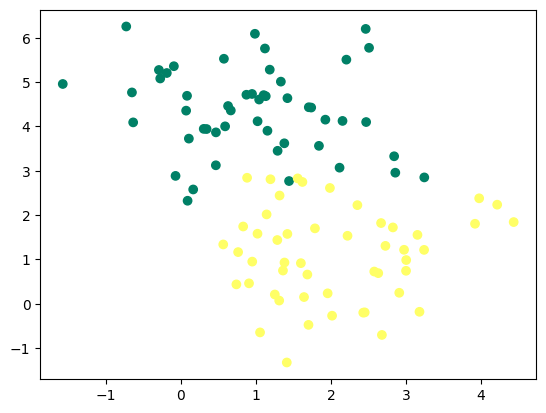

In [5]:
# Generate dataset contening 100 rows and 2 variables
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimension de X:', X.shape)
print('dimension de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

2. Fonction du modele

In [6]:
def initialization(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [7]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [8]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [9]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [12]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [13]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
from tqdm import tqdm

In [29]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    W, b = initialization(X_train)
    
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    
    # Boucle d'apprentissage
    for i in tqdm(range(n_iter)):
        
        # Activation
        A = model(X_train, W, b)
        
        if i %10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))
            
            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))
        
        # Mise a jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate = learning_rate)
        
    # y_pred = predict(X, W, b)
    # print(accuracy_score(y, y_pred))
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="train loss")
    plt.plot(test_loss, label="test loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="train acc")
    plt.plot(test_acc, label="test acc")
    plt.legend()
    plt.show()
    
    return (W, b)

Application Chat vs Chient

In [19]:
!pip install h5py
from utilities import *

Defaulting to user installation because normal site-packages is not writeable


In [20]:
X_train, y_train, X_test, y_test = load_data()

In [21]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [22]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


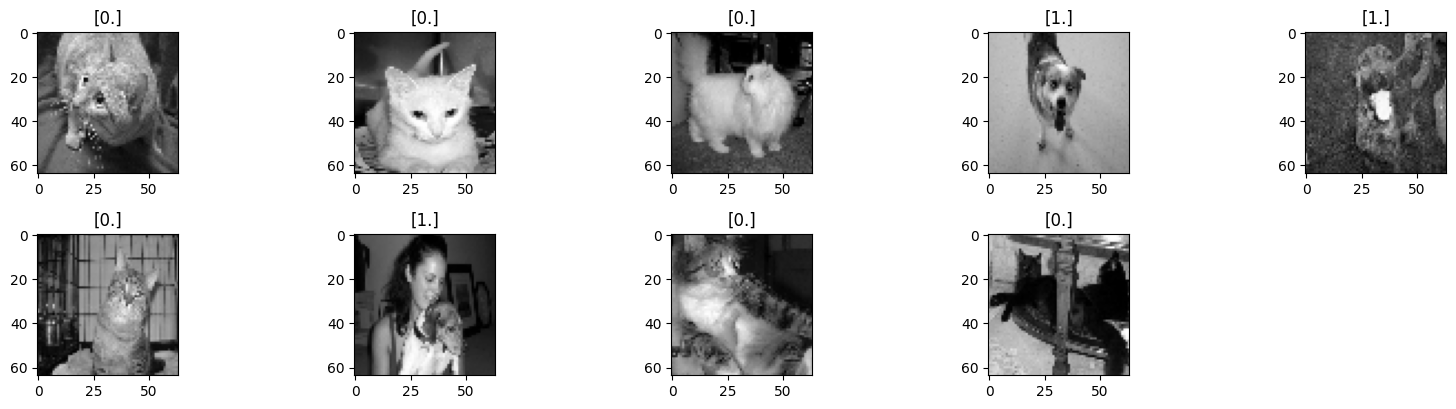

In [23]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

Entrainement du modele

In [24]:
# X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_train_reshape.shape

(1000, 4096)

In [25]:
# X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()
X_test_reshape.shape

(200, 4096)

100%|██████████| 10000/10000 [00:54<00:00, 183.87it/s]


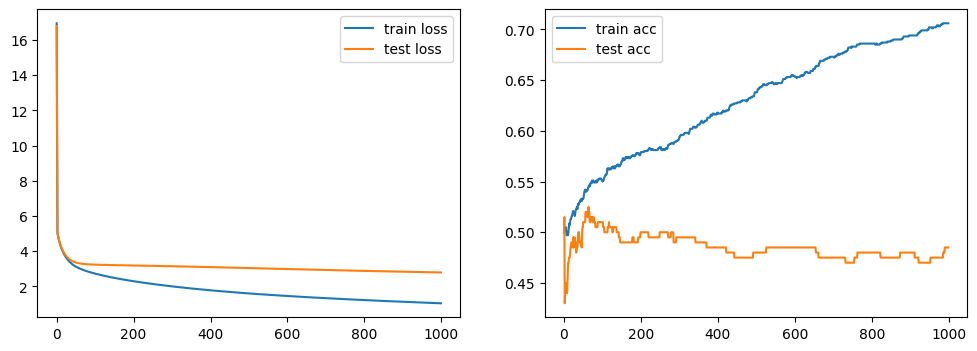

In [31]:
# X represente chaque photo et y la classe que l'on cherche a predire
# Operation la plus importante du machine learning : normalisation des donnees
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01, n_iter=10000)